In [25]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error
# import minmax
from sklearn.preprocessing import MinMaxScaler
import numpy as np

df = pd.read_csv('sinais_vitais_com_label_treino.txt', sep=',', header=0)
X = df.iloc[:, 3:6]
y = df.iloc[:, 6]

# normalize the data between 0 and 1
scaler = MinMaxScaler()
X_new = scaler.fit_transform(X)

model1   = MLPRegressor(hidden_layer_sizes = (100, 100), activation = 'tanh', solver = 'adam', max_iter = 800, learning_rate_init = 0.002, batch_size=32, learning_rate='adaptive')
model2   = MLPRegressor(hidden_layer_sizes = (100, 100), activation = 'tanh', solver = 'adam', max_iter = 800, learning_rate_init = 0.002, batch_size=64, learning_rate='adaptive')
model3   = MLPRegressor(hidden_layer_sizes = (100, 100), activation = 'tanh', solver = 'adam', max_iter = 800, learning_rate_init = 0.002, batch_size=32, learning_rate='adaptive', early_stopping=True)
best_model = None
best_rmse = None

models = [model1, model2, model3]
for i, model in enumerate(models, start=1):
    model.fit(X, y)
    predictions = model.predict(X)
    rmse = np.sqrt(mean_squared_error(y, predictions, squared=False))
    print(f'Model {i} RMSE: {rmse}')
    if best_model is None or rmse < best_rmse:
            best_rmse = rmse
            best_model = model

print(f'Best model RMSE: {best_rmse}')

blind_test_data = pd.read_csv('sinais_vitais_validacao.txt', sep=',', header=0)
X_blind_test = blind_test_data.iloc[:, 3:6]

blind_test_predictions = best_model.predict(X_blind_test)

pd.DataFrame(blind_test_predictions).to_csv('predictions.csv', index=False, header=False)

Model 1 RMSE: 1.7809156118576748
Model 2 RMSE: 1.888397677124201
Model 3 RMSE: 2.835531052742662
Best model RMSE: 1.7809156118576748


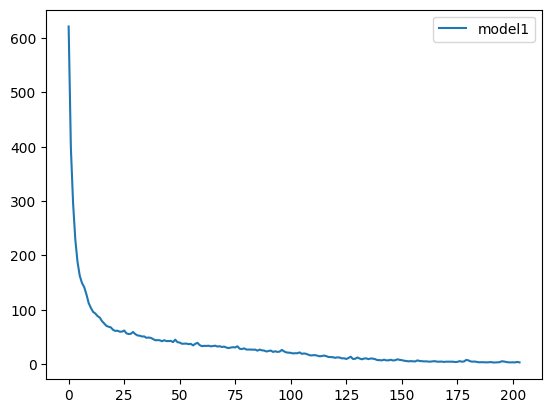

In [24]:
import matplotlib.pyplot as plt

plt.plot(model1.loss_curve_, label='model1')
plt.legend()
plt.show()

In [10]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(model2, X, y, cv=5, scoring='neg_mean_squared_error')
print(scores)
print(np.sqrt(-scores))
print(np.mean(np.sqrt(-scores)))

[-13.35082074 -25.48438773 -50.02148776 -21.66818689 -46.30669024]
[3.65387749 5.04820639 7.07258706 4.65490998 6.80490193]
5.446896569736383


In [20]:
from sklearn.model_selection import cross_val_score

models = [model1, model2, model3]
best_model = None
best_rmse = float('inf')

for i, model in enumerate(models, start=1):
    scores = cross_val_score(model, X, y, cv=5, scoring='neg_mean_squared_error')
    rmse_scores = np.sqrt(-scores)
    avg_rmse = np.mean(rmse_scores)
    print(f'Model {i} average RMSE: {avg_rmse}')
    if avg_rmse < best_rmse:
        best_rmse = avg_rmse
        best_model = model

print(f'Best model average RMSE: {best_rmse}')

Model 1 average RMSE: 8.150750427024425
Model 2 average RMSE: 4.511898391330208
Model 3 average RMSE: 6.7055921773216225
Best model average RMSE: 4.511898391330208


In [12]:
X_real = pd.read_csv('sinais_vitais_validacao.txt', sep=',', header=0)
last_column = X_real.iloc[:, 6]
last_column

0       0.0
1       0.0
2       0.0
3       0.0
4       0.0
       ... 
3995    0.0
3996    0.0
3997    0.0
3998    0.0
3999    0.0
Name: gravidade, Length: 4000, dtype: float64

In [13]:
blind_test_predictions

array([37.91595837, 38.41640056, 33.03254242, ..., 44.6371781 ,
       44.6713791 , 21.16087896])

In [14]:
# compare the % difference of predictions and X_real gravidade. So get the accuracy, as example if the prediction is 10 and the real is 9, the accuracy is 90%
accuracy = []
for i in range(len(blind_test_predictions)):
    accuracy.append((blind_test_predictions[i] / last_column[i]) * 100)
print(accuracy)
# mean of the accuracy
print(np.mean(accuracy))

[inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf,

C:\Users\SaczkHen\AppData\Local\Temp\ipykernel_5428\4091314051.py:4: RuntimeWarning: divide by zero encountered in scalar divide
  accuracy.append((blind_test_predictions[i] / last_column[i]) * 100)
